<a href="https://colab.research.google.com/github/malina-io/MyFirstGitProject/blob/main/datapipe_io_project_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# datapipe.io project overview

Datapipe.io is a platform designed to enhance workflows that require human-in-the-loop systems, such as data annotation, quality assurance, and feedback review. It simplifies the process by providing a unified interface where users can connect to different existing data sources, perform labeling or review tasks, and save the results back into the data ecosystem.

# How it started

Our project started with the observation that no cloud-based tool offers an ideal human-in-the-loop experience for workflows such as data annotation, quality assurance, and feedback review for AI generated datasets.

To address this gap, we propose a cloud-based human-in-the-loop workflow manager that simplifies the process by providing a unified interface where users can connect to different existing data sources, perform labeling or review tasks, and save the results back into the data ecosystem.

Datapipe.io tackles one of the biggest challenges for modern businesses: unifying and managing data from diverse sources. It enhances workflows, improves data quality, and enables businesses to make smarter decisions based on actionable insights.

The **key challenges** datapipe.io could address include:


1.   **Lack of streamlined tools**: Current solutions often fail to integrate well with existing ecosystems or lack user-friendly interfaces for human reviewers.
2.   **Data inconsistencies**: Diverse data sources lead to variations in structure and quality, requiring significant manual effort for harmonization.
3.  **Efficiency and scalability**: Traditional approaches to data workflows are not scalable and involve redundant or inefficient processes.
4.   **Human oversight limitations**: The absence of intelligent systems to prioritize and highlight critical data for review reduces overall effectiveness.

# MVP

After several internal debates, our team set out to develop an MVP with a clearly defined set of functionalities:
*   **User authentication**
*   **Data ingestion**: Upload CSV files and connect external sources like Google Sheets.
*   **Annotation and review**: Use an intuitive interface for labeling, reviewing, and annotating data. Manage workflows for quality assurance and feedback integration.
*   Data transformation: Clean and structure datasets for analysis or machine learning.
*   **Export**: Save processed datasets locally (JSON/CSV) or to Google Sheets.
*   **Human-in-the-loop workflows**: Integrate human expertise for high-quality, reliable datasets.

# Each track’s contribution

## Web development

The web development team built the foundation of the project. They:
*   Developed the backend API using **Node.js, Express**, and **MongoDB Atlas** for seamless data handling.
*   Built an intuitive frontend with **React**, ensuring a smooth user experience.
*   Set up test data to validate system functionality.
*   Designed and created a prototype for the web interface, laying the groundwork for future iterations.

## Data Science

The data science team focused on creating a Python API to power data-driven insights. Their contributions include:
*   Developing a **Python API** with **FastAPI**, setting up a virtual environment, and integrating it with **MongoDB** using **Uvicorn** to handle requests efficiently.
*   Successfully establishing a database connection, ensuring seamless data flow.
*   Actively working on testing API endpoints with **Postman** for validation and debugging.

# Project Deep Dive

datapipe.io is a full-stack web application that integrates web development, backend services, and data science functionalities. It is structured into three primary layers: Frontend, Backend, and Data Science.

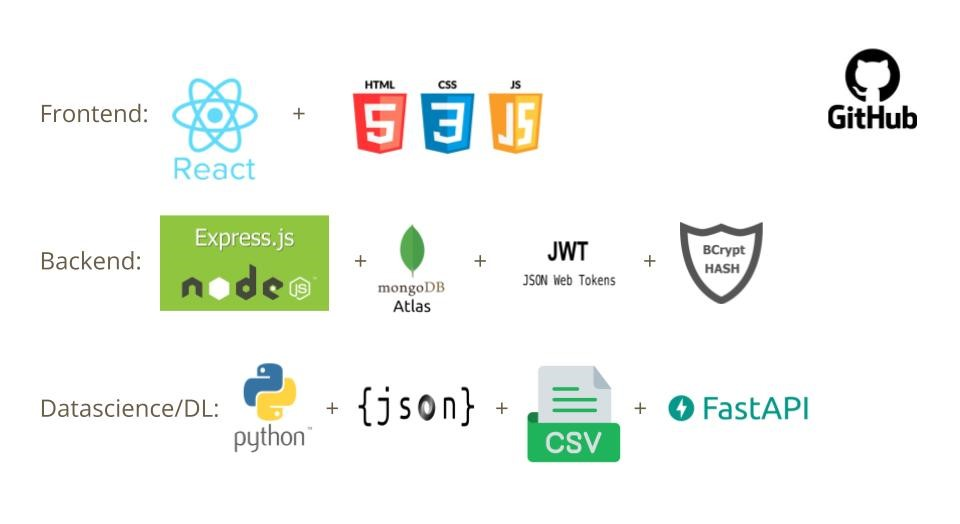

*Fig. 1: Project tech stack overview*

## 1. Frontend: React-Based UI

The frontend is developed using **React.js**, a powerful JavaScript library for building dynamic and interactive user interfaces. It is styled using **HTML, CSS, and JavaScript**, ensuring a responsive and visually appealing design.
*   **React**: Manages the UI components and enhances the user experience with a seamless, single-page application.
*   **HTML & CSS**: Structure and styling to ensure a polished design.
*   **JavaScript**: Enhances interactivity and communication with the backend.

We started with a simple design concept for the UI interface:


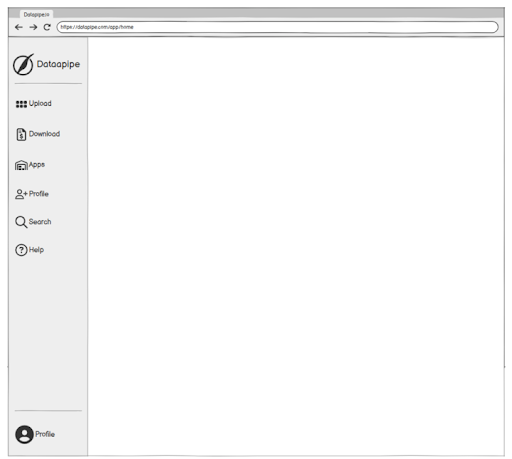

*Fig. 2: UI design concept*

The first prototype included user authentication, allowing login and registration.

A JWT token is generated upon login to access protected content, and passwords are securely encrypted in the database.

Next iterations would include restricting task visibility to only the creator and assigned users.

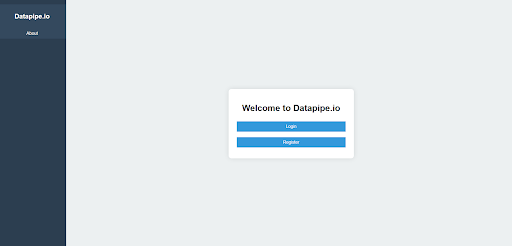

*Fig. 3: First prototype - homepage*

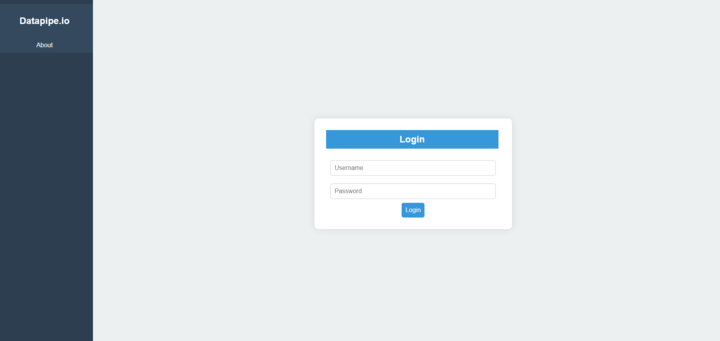

*Fig. 4: First prototype - login*

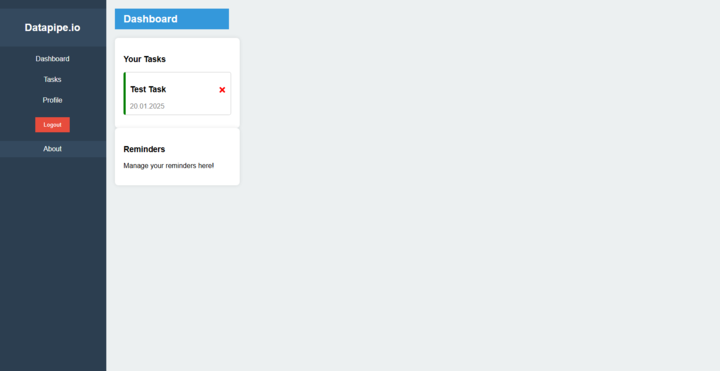

*Fig. 5: First prototype - logged in screen*

In the latest iteration, tasks can now be assigned to different users and can only be deleted by the task owner.

A Task Detail Page has been added, allowing CSV file uploads, which are automatically displayed as a table with a validation row.

The CSV data, along with validation progress, can be stored in the database.

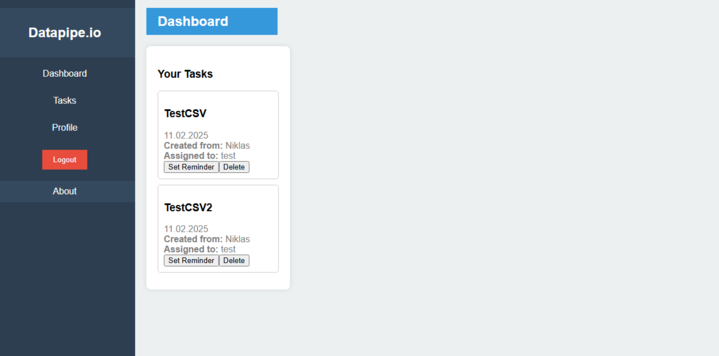

*Fig. 6: Iteration - logged in dashboard with assigned tasks*

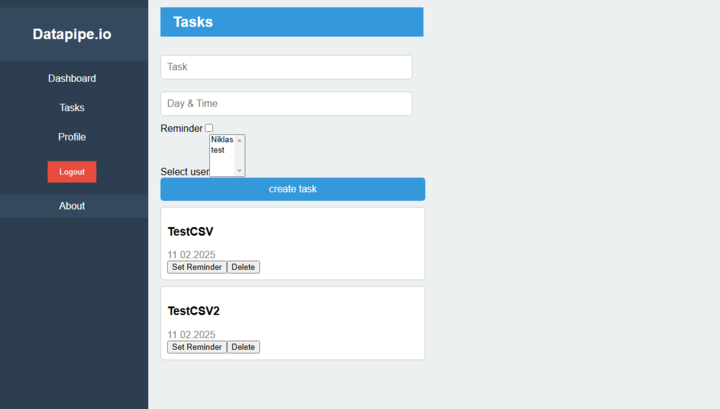

*Fig. 7: Iteration - task creation*

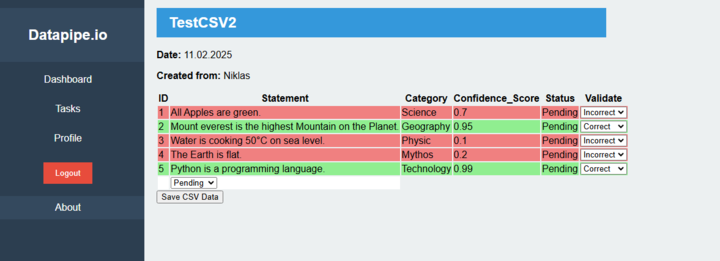

*Fig. 8: Iteration - task overview*

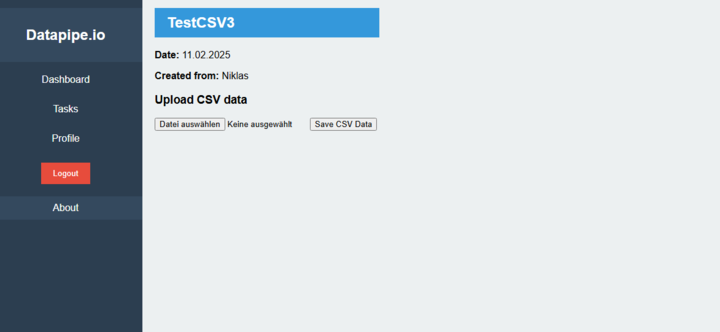

*Fig. 9: Iteration - micro task*

## 2. Backend: Node.js & Express.js API

The backend is built using **Node.js and Express.js**, which handle API requests and manage business logic. It ensures secure and efficient data handling with the following technologies:

* **Express.js**: A lightweight framework for building RESTful APIs.
MongoDB Atlas: A cloud-based NoSQL database used for scalable and flexible data storage.
* **JWT (JSON Web Tokens)**: Implements authentication and authorization, ensuring secure user access.
* **BCrypt**: Hashing and salting for secure password storage and user authentication.

## 3. Data Science: FastAPI & Python

The data science layer is built with **Python and FastAPI**, providing a high-performance API for processing and analyzing data.
* **Python**: Powers data processing and ML/DL workflows.
* **FastAPI**: A modern web framework optimized for high-performance API development.
* **JSON & CS**V: Data formats used for communication between services, handling structured datasets.

As part of the project, we connected FastAPI with MongoDB using motor (MongoDB’s async driver), tested API endpoints with Postman, and debugged common issues. We synthesized the steps in a guide on sending and retrieving data from MongoDB using FastAPI.


**Step 1: Install Required Dependencies**

To get started, install the necessary Python libraries using the following command:

`pip install fastapi[all] motor python-dotenv`

* `fastapi`: The web framework for building APIs.
* `motor`: Async driver for MongoDB.
* `python-dotenv`: Loads environment variables from a .env file.

Additionally, ensure that MongoDB is installed locally or set up in **MongoDB Atlas**.


**Step 2: Set Up MongoDB Atlas**

* **Create an Account** on MongoDB Atlas.
* **Set Up a Cluste**r and create a new **database named sample_mflix**.
* **Create a Collection** inside this database called new_users.
* **Obtain Your Connection String**:
* Click on **Database > Connect** and choose **Python — Driver**.
* Copy the MongoDB URI (e.g., `[mongodb+srv://<username>:<password>@cluster.mongodb.net/sample_mflix]`).
* Replace `<username>` and `<password>` with actual credentials.

**Step 3: Create the FastAPI Application**

**Create a `.env` File**

Store your MongoDB URI in a .env file to keep it secure:
`MONGO_URI=mongodb+srv://<username>:<password>@cluster.mongodb.net/sample_mflix`

Create `mainApi.py`

Now, set up the FastAPI server and connect to MongoDB.

Create `mainApi.py`

Now, set up the FastAPI server and connect to MongoDB.

In [ ]:
from fastapi import FastAPI
from motor.motor_asyncio import AsyncIOMotorClient
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

app = FastAPI()

# Connect to MongoDB
MONGO_URI = os.getenv("MONGO_URI")
client = AsyncIOMotorClient(MONGO_URI)
database = client["sample_mflix"]
collection = database["new_users"]

@app.post("/add_user")
async def add_user(user: dict):
   result = await collection.insert_one(user)
   return {"message": "User added!", "user_id": str(result.inserted_id)}

@app.get("/check_users")
async def check_users():
   users = await collection.find().to_list(10)
   return {"users": users}

**Start the FastAPI server:**

`uvicorn data-science.mainApi:app --reload`

**Step 4: Test API Using Postman**

**1. Add User via Postman**

* Open Postman and **create a new POST request** to:

http://127.0.0.1:8000/add_user

* In the **Body** (raw, JSON format), enter:

In [ ]:
{
   "name": "John Doe",
   "email": "johndoe@example.com"
}

* Click **Send**. You should get a response like:

In [ ]:
{
   "message": "User added!",
   "user_id": "65c12345abcd67890"
}

**2. Retrieve Users**

* Create a **GET reques**t to:

ttp://127.0.0.1:8000/check_users

* Click **Send** to retrieve stored users.

**Step 5: Debugging Issues**

**Issue 1: Data Not Appearing in MongoDB Compass?**

* Ensure you’re connected to the correct database `sample_mflix`.
* Check `new_users` collection.
* Restart MongoDB and the FastAPI server.


**Issue 2: 500 Internal Server Error?**

If you get a serialization error, modify the response to convert `_id` to a string:

`return {"users": [{"_id": str(user["_id"], "name": user["name"]} for user in users]}`

By following these steps, you will be able to successfully connect FastAPI with MongoDB, send data using Postman, and retrieve it from MongoDB. This setup can be extended for building more advanced applications.

**4. Version Control & Collaboration: GitHub**

The entire project is managed using **GitHub**, allowing version control, collaboration, and continuous integration.

# datapipe.io demo

We invite you to take a quick tour of the datapipe.io platform: https://www.youtube.com/watch?v=jMrcPoYrN1c